#Importando Bibliotecas e Lendo arquivo

In [1]:
!pip install -U plotly

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [3]:
df = pd.read_csv("historico_regiao_sul.csv")
df

,Unnamed: 0,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,1998,-,-,-,-,-,38,59,51,127,234,192,713,1414
1,1999,81,59,85,51,71,40,106,1014,998,523,632,1453,5113
2,2000,189,118,148,59,47,55,125,936,444,721,122,268,3232
3,2001,55,40,24,47,32,45,131,404,278,250,204,210,1720
4,2002,332,67,56,97,75,119,1167,4961,4493,780,1545,614,14306
5,2003,360,182,300,668,1223,1242,1779,8109,5671,2958,1411,743,24646
6,2004,377,259,535,575,143,1023,1200,4488,3396,3015,1283,597,16891
7,2005,323,291,512,297,567,547,1183,4075,1184,519,1554,420,11472
8,2006,247,193,310,586,1065,731,2213,5080,2638,1154,553,212,14982
9,2007,129,151,229,273,246,842,1001,2858,2732,1059,627,362,10509


#Tratamento do dataframe

In [4]:
df.drop([0 ,1,23,24,25,26], axis=0,inplace=True)
#Foram retirados as linhas dos anos 1998, 1999 e 2021 os quais não são objeto de estudo.
#Foram retiradas também as linhas com os dados de média, máximo e mínimo, pois, a análise será feita diretamente do Dataframe utilizando o Pandas.

In [5]:
#Criado uma nova coluna para o dado dos anos.
df["Ano"]= df["Unnamed: 0"]
df.drop("Unnamed: 0", axis=1,inplace=True)
df.set_index("Ano")

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
Ano,,,,,,,,,,,,,
2000,189,118,148,59,47,55,125,936,444,721,122,268,3232
2001,55,40,24,47,32,45,131,404,278,250,204,210,1720
2002,332,67,56,97,75,119,1167,4961,4493,780,1545,614,14306
2003,360,182,300,668,1223,1242,1779,8109,5671,2958,1411,743,24646
2004,377,259,535,575,143,1023,1200,4488,3396,3015,1283,597,16891
2005,323,291,512,297,567,547,1183,4075,1184,519,1554,420,11472
2006,247,193,310,586,1065,731,2213,5080,2638,1154,553,212,14982
2007,129,151,229,273,246,842,1001,2858,2732,1059,627,362,10509
2008,167,197,171,329,732,298,1582,2005,1325,395,481,585,8267


In [6]:
#Verificanto o tipo dos dados colunares.
df.dtypes

Janeiro      object
Fevereiro    object
Março        object
Abril        object
Maio         object
Junho         int64
Julho         int64
Agosto        int64
Setembro      int64
Outubro       int64
Novembro     object
Dezembro     object
Total         int64
Ano          object
dtype: object

In [7]:
#Fazendo uma mudança do tipo dos dados colunáres para inteiro.
df.Janeiro = df.Janeiro.astype("int64")
df.Fevereiro = df.Fevereiro.astype("int64")
df.Março = df.Março.astype("int64")
df.Abril = df.Abril.astype("int64")
df.Maio = df.Maio.astype("int64")
df.Novembro = df.Novembro.astype("int64")
df.Dezembro = df.Dezembro.astype("int64")

#FAZER A MUDAÇA DOS DADOS DE ANO PARA DATA??
df.Ano = df.Ano.astype("int64")

In [8]:
#Novos tipos dos dados colunáres.
df.dtypes

Janeiro      int64
Fevereiro    int64
Março        int64
Abril        int64
Maio         int64
Junho        int64
Julho        int64
Agosto       int64
Setembro     int64
Outubro      int64
Novembro     int64
Dezembro     int64
Total        int64
Ano          int64
dtype: object

#Criando um Dataframe transposto para facilitar a criação de alguns graficos e algumas análises

In [9]:
df_transposta = df.T
colunas = df_transposta.loc['Ano'].to_list()
df_transposta.columns = colunas
df_transposta.drop(['Total','Ano'], inplace=True)
df_transposta
#da pra usar esse dataframe para fazer os gráficos de Meses X N° de focos

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Janeiro,189,55,332,360,377,323,247,129,167,191,70,81,150,123,159,134,248,125,70,166,106
Fevereiro,118,40,67,182,259,291,193,151,197,83,106,39,154,82,109,91,69,122,195,82,174
Março,148,24,56,300,535,512,310,229,171,269,107,111,299,122,109,144,116,104,117,161,506
Abril,59,47,97,668,575,297,586,273,329,619,242,173,181,340,136,279,221,192,394,125,1074
Maio,47,32,75,1223,143,567,1065,246,732,552,133,365,567,290,211,310,152,123,426,76,1028
Junho,55,45,119,1242,1023,547,731,842,298,391,365,504,476,219,180,372,676,300,272,504,498
Julho,125,131,1167,1779,1200,1183,2213,1001,1582,421,786,689,744,722,502,236,2104,1876,720,986,627
Agosto,936,404,4961,8109,4488,4075,5080,2858,2005,3940,3417,1216,2204,1527,2385,1403,2971,1980,1953,3730,3182
Setembro,444,278,4493,5671,3396,1184,2638,2732,1325,371,1254,2713,1016,1271,834,949,2734,1889,658,1526,1168
Outubro,721,250,780,2958,3015,519,1154,1059,395,981,798,568,424,467,593,226,306,233,255,482,720


In [10]:
#Verificação dos tipos da transposta
df_transposta.dtypes

2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
2019    int64
2020    int64
dtype: object

#Analise Estatistica dos dados

In [11]:
df.describe()

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,181.047619,133.523810,211.904762,328.904762,398.238095,459.952381,990.190476,2991.619048,1835.428571,804.952381,560.238095,303.047619,9199.047619,2010.000000
std,97.942063,68.656842,150.290021,251.094784,355.719117,308.657168,620.212594,1765.321429,1404.874321,774.223836,473.064256,186.597555,5176.936386,6.204837
min,55.000000,39.000000,24.000000,47.000000,32.000000,45.000000,125.000000,404.000000,278.000000,226.000000,51.000000,76.000000,1720.000000,2000.000000
25%,123.000000,82.000000,111.000000,173.000000,133.000000,272.000000,627.000000,1953.000000,949.000000,395.000000,213.000000,171.000000,5741.000000,2005.000000
50%,159.000000,118.000000,148.000000,273.000000,290.000000,391.000000,786.000000,2858.000000,1271.000000,568.000000,444.000000,263.000000,8134.000000,2010.000000
75%,247.000000,182.000000,299.000000,394.000000,567.000000,547.000000,1200.000000,3940.000000,2713.000000,798.000000,622.000000,362.000000,10509.000000,2015.000000
max,377.000000,291.000000,535.000000,1074.000000,1223.000000,1242.000000,2213.000000,8109.000000,5671.000000,3015.000000,1554.000000,743.000000,24646.000000,2020.000000


In [12]:
df_transposta.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,269.333333,143.333333,1192.166667,2053.833333,1407.583333,956.000000,1248.500000,875.750000,688.916667,677.833333,673.000000,594.916667,567.500000,478.416667,459.750000,355.916667,853.250000,651.250000,461.916667,692.833333,796.333333
std,286.861491,124.244139,1722.175888,2440.047721,1424.628529,1064.316938,1441.167298,954.047752,613.597360,1057.317088,936.265794,743.435815,578.710871,466.268058,649.496186,407.133764,1085.656326,774.894142,509.496089,1050.369444,836.215320
min,47.000000,24.000000,56.000000,182.000000,143.000000,291.000000,193.000000,129.000000,167.000000,83.000000,70.000000,39.000000,150.000000,82.000000,109.000000,51.000000,69.000000,104.000000,70.000000,76.000000,106.000000
25%,103.250000,43.750000,91.500000,591.000000,495.500000,395.750000,294.250000,241.750000,272.750000,197.000000,126.500000,157.500000,178.500000,195.000000,139.750000,123.250000,149.250000,124.500000,210.750000,152.000000,317.250000
50%,136.500000,93.000000,473.000000,1232.500000,810.000000,533.000000,658.500000,494.500000,438.000000,381.000000,333.000000,404.500000,424.000000,292.500000,169.500000,231.000000,277.000000,241.000000,269.500000,238.000000,566.500000
75%,312.000000,220.000000,1261.500000,2073.750000,1716.000000,1183.250000,1418.750000,1015.500000,880.250000,568.750000,789.000000,598.250000,611.250000,530.750000,524.750000,325.500000,1033.000000,935.500000,484.000000,624.500000,1039.500000
max,936.000000,404.000000,4961.000000,8109.000000,4488.000000,4075.000000,5080.000000,2858.000000,2005.000000,3940.000000,3417.000000,2713.000000,2204.000000,1527.000000,2385.000000,1403.000000,2971.000000,1980.000000,1953.000000,3730.000000,3182.000000


In [13]:
#add coluna com médias anuais
df["Medias"]= df.Total/12

#Média anual de focos de queimadas
mediaAnual = df.Medias.mean()
desvioAnual = df.Medias.std()
print(mediaAnual)
print(desvioAnual)

766.5873015873016
431.41136552356846


In [14]:
#Anos com número de focos mair que a média
print("A média anual foi: ", mediaAnual)
print("\nAbaixo estão os anos com número de focos maior que a média\n")
df[df.Medias>=mediaAnual]

A média anual foi:  766.5873015873016

Abaixo estão os anos com número de focos maior que a média



,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
4,332,67,56,97,75,119,1167,4961,4493,780,1545,614,14306,2002,1192.166667
5,360,182,300,668,1223,1242,1779,8109,5671,2958,1411,743,24646,2003,2053.833333
6,377,259,535,575,143,1023,1200,4488,3396,3015,1283,597,16891,2004,1407.583333
7,323,291,512,297,567,547,1183,4075,1184,519,1554,420,11472,2005,956.000000
8,247,193,310,586,1065,731,2213,5080,2638,1154,553,212,14982,2006,1248.500000
9,129,151,229,273,246,842,1001,2858,2732,1059,627,362,10509,2007,875.750000
18,248,69,116,221,152,676,2104,2971,2734,306,501,141,10239,2016,853.250000
22,106,174,506,1074,1028,498,627,3182,1168,720,365,108,9556,2020,796.333333


In [15]:
#Verificação do número de anos acima da média anual
df[df.Medias>=mediaAnual].shape

(8, 15)

In [16]:
#Anos com número de focos menor que a média
print("A média anual foi: ", mediaAnual)
print("\nAbaixo estão os anos com número de focos menor que a média\n")
df[df.Medias<=mediaAnual]

A média anual foi:  766.5873015873016

Abaixo estão os anos com número de focos menor que a média



,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
2,189,118,148,59,47,55,125,936,444,721,122,268,3232,2000,269.333333
3,55,40,24,47,32,45,131,404,278,250,204,210,1720,2001,143.333333
10,167,197,171,329,732,298,1582,2005,1325,395,481,585,8267,2008,688.916667
11,191,83,269,619,552,391,421,3940,371,981,199,117,8134,2009,677.833333
12,70,106,107,242,133,365,786,3417,1254,798,497,301,8076,2010,673.000000
13,81,39,111,173,365,504,689,1216,2713,568,444,236,7139,2011,594.916667
14,150,154,299,181,567,476,744,2204,1016,424,424,171,6810,2012,567.500000
15,123,82,122,340,290,219,722,1527,1271,467,295,283,5741,2013,478.416667
16,159,109,109,136,211,180,502,2385,834,593,158,141,5517,2014,459.750000
17,134,91,144,279,310,372,236,1403,949,226,51,76,4271,2015,355.916667


In [17]:
#Verificação do número de anos abaixo da média anual
df[df.Medias<=mediaAnual].shape

(13, 15)

Maior número de focos de queimadas em um ano

In [18]:
maxAnual = df.Total.max()
df[df.Total == maxAnual]

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
5,360,182,300,668,1223,1242,1779,8109,5671,2958,1411,743,24646,2003,2053.833333


Menor número de focos de queimadas em um ano

In [19]:
minAnual = df.Total.min()
df[df.Total == minAnual]

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
3,55,40,24,47,32,45,131,404,278,250,204,210,1720,2001,143.333333


#Descretização por médias anuais

In [20]:
counts = pd.cut(df['Medias'], 5).value_counts()
counts

(525.433, 907.533]      10
(141.423, 525.433]       6
(907.533, 1289.633]      3
(1671.733, 2053.833]     1
(1289.633, 1671.733]     1
Name: Medias, dtype: int64

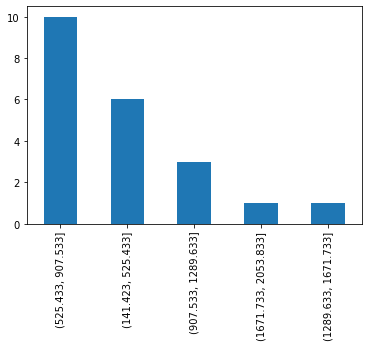

In [21]:
#Histograma de frequências do número de focos
counts
counts.plot.bar(x= 'Intervalo do Nº de focos de queimadas', y='Fraquência')

#Adicionar legendas para os eixos e ordenar os valores do eixo x 

#Estudo comparativo mensal - Gráfico Anos x N° de focos e Boxplot

In [22]:
titX = dict(title = 'Anos')
titY = dict(title = 'Queimadas')

titulo = 'Nº de focos de queimadas por mês entre os anos de 2000 e 2020'
meses = df.iloc[:,0:12].columns.to_list()

fig1 = px.line(df,x='Ano',y=meses)
fig1.update_layout(
    title = titulo,
    xaxis = titX,
    yaxis = titY,
    legend_title = 'Meses'
)
fig1.show()

#Janeiro

Maxímo: 377.0 
Mínimo: 55.0 
Média: 181.04761904761904 
Desvio: 97.94206256276014


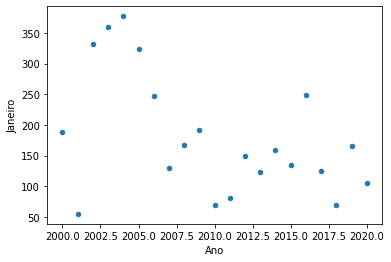

In [23]:
max_jan = df.max()["Janeiro"]
min_jan = df.min()["Janeiro"]
med_jan = df.mean()["Janeiro"]
desv_jan = df.std()["Janeiro"]
df.plot.scatter(x='Ano',y="Janeiro")
print(f"Maxímo: {max_jan} \nMínimo: {min_jan} \nMédia: {med_jan} \nDesvio: {desv_jan}")

In [24]:
hJaneiro = px.histogram(df,x='Janeiro')
hJaneiro.show()

In [25]:
px.box(df['Janeiro'])

#Fevereiro

Maxímo: 291.0 
Mínimo: 39.0 
Média: 133.52380952380952 
Desvio: 68.65684164569402


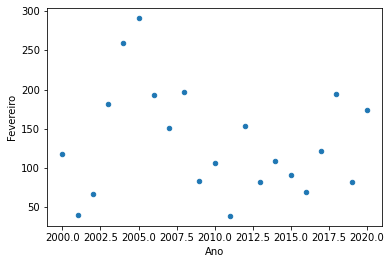

In [26]:
max_fev = df.max()["Fevereiro"]
min_fev = df.min()["Fevereiro"]
med_fev = df.mean()["Fevereiro"]
desv_fev = df.std()["Fevereiro"]
df.plot.scatter(x='Ano',y="Fevereiro")
print(f"Maxímo: {max_fev} \nMínimo: {min_fev} \nMédia: {med_fev} \nDesvio: {desv_fev}")

In [27]:
hFevereiro = px.histogram(df,x='Fevereiro')
hFevereiro.show()

In [28]:
px.box(df['Fevereiro'])

#Março

Maxímo: 535.0 
Mínimo: 24.0 
Média: 211.9047619047619 
Desvio: 150.29002121295505


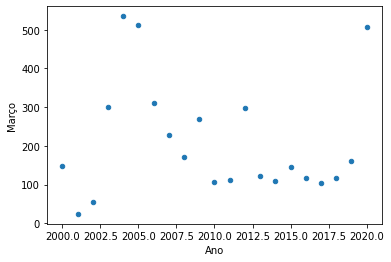

In [29]:
max_mar = df.max()["Março"]
min_mar = df.min()["Março"]
med_mar = df.mean()["Março"]
desv_mar = df.std()["Março"]
df.plot.scatter(x='Ano',y="Março")
print(f"Maxímo: {max_mar} \nMínimo: {min_mar} \nMédia: {med_mar} \nDesvio: {desv_mar}")

In [30]:
hMarco = px.histogram(df,x='Março')
hMarco.show()

In [31]:
px.box(df['Março'])

#Abril

Maxímo: 1074.0 
Mínimo: 47.0 
Média: 328.9047619047619 
Desvio: 251.09478384902874


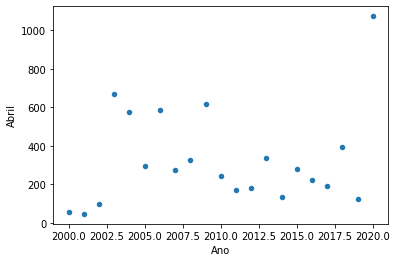

In [32]:
max_abr = df.max()["Abril"]
min_abr = df.min()["Abril"]
med_abr = df.mean()["Abril"]
desv_abr = df.std()["Abril"]
df.plot.scatter(x='Ano',y="Abril")
print(f"Maxímo: {max_abr} \nMínimo: {min_abr} \nMédia: {med_abr} \nDesvio: {desv_abr}")

In [33]:
hAbril = px.histogram(df,x='Abril')
hAbril.show()

In [34]:
px.box(df['Abril'])

#Maio

Maxímo: 1223.0 
Mínimo: 32.0 
Média: 398.23809523809524 
Desvio: 355.71911738925485


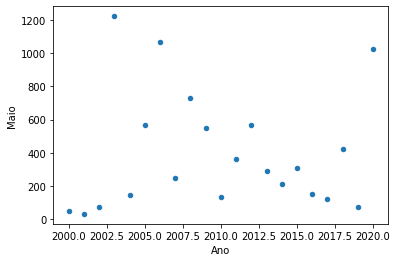

In [35]:
max_mai = df.max()["Maio"]
min_mai = df.min()["Maio"]
med_mai = df.mean()["Maio"]
desv_mai = df.std()["Maio"]
df.plot.scatter(x='Ano',y="Maio")
print(f"Maxímo: {max_mai} \nMínimo: {min_mai} \nMédia: {med_mai} \nDesvio: {desv_mai}")

In [36]:
hMaio = px.histogram(df,x='Maio')
hMaio.show()

In [37]:
px.box(df['Maio'])

#Junho

Maxímo: 1242.0 
Mínimo: 45.0 
Média: 459.95238095238096 
Desvio: 308.65716842323235


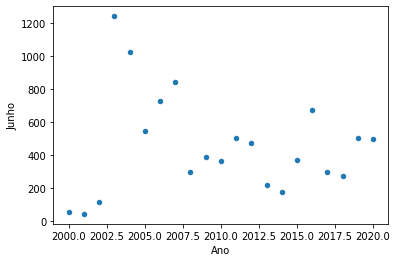

In [38]:
max_jun = df.max()["Junho"]
min_jun = df.min()["Junho"]
med_jun = df.mean()["Junho"]
desv_jun = df.std()["Junho"]
df.plot.scatter(x='Ano',y="Junho")
print(f"Maxímo: {max_jun} \nMínimo: {min_jun} \nMédia: {med_jun} \nDesvio: {desv_jun}")

In [39]:
hJunho = px.histogram(df,x='Junho')
hJunho.show()

In [40]:
px.box(df['Junho'])

#Julho

Maxímo: 2213.0 
Mínimo: 125.0 
Média: 990.1904761904761 
Desvio: 620.2125941197598


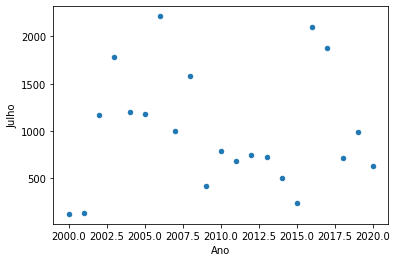

In [41]:
max_jul = df.max()["Julho"]
min_jul = df.min()["Julho"]
med_jul = df.mean()["Julho"]
desv_jul = df.std()["Julho"]
df.plot.scatter(x='Ano',y="Julho")
print(f"Maxímo: {max_jul} \nMínimo: {min_jul} \nMédia: {med_jul} \nDesvio: {desv_jul}")

In [42]:
hJulho = px.histogram(df,x='Julho')
hJulho.show()

In [43]:
px.box(df['Julho'])

#Agosto

Maxímo: 8109.0 
Mínimo: 404.0 
Média: 2991.6190476190477 
Desvio: 1765.3214289808664


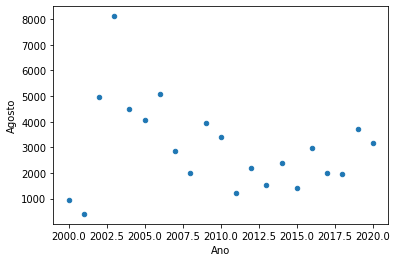

In [44]:
max_ago = df.max()["Agosto"]
min_ago = df.min()["Agosto"]
med_ago = df.mean()["Agosto"]
desv_ago = df.std()["Agosto"]
df.plot.scatter(x='Ano',y="Agosto")
print(f"Maxímo: {max_ago} \nMínimo: {min_ago} \nMédia: {med_ago} \nDesvio: {desv_ago}")

In [45]:
hAgosto= px.histogram(df,x='Agosto')
hAgosto.show()

In [46]:
px.box(df['Agosto'])

#Setembro

Maxímo: 5671.0 
Mínimo: 278.0 
Média: 1835.4285714285713 
Desvio: 1404.8743207642656


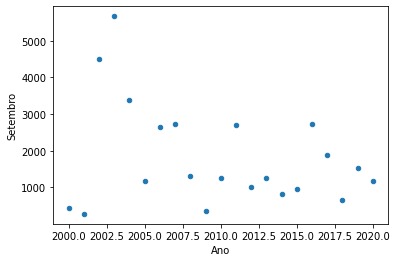

In [47]:
max_set = df.max()["Setembro"]
min_set = df.min()["Setembro"]
med_set = df.mean()["Setembro"]
desv_set = df.std()["Setembro"]
df.plot.scatter(x='Ano',y="Setembro")
print(f"Maxímo: {max_set} \nMínimo: {min_set} \nMédia: {med_set} \nDesvio: {desv_set}")

In [48]:
hSetembro = px.histogram(df,x='Setembro')
hSetembro.show()

In [49]:
px.box(df['Setembro'])

#Outubro

Maxímo: 3015.0 
Mínimo: 226.0 
Média: 804.952380952381 
Desvio: 774.2238356050838


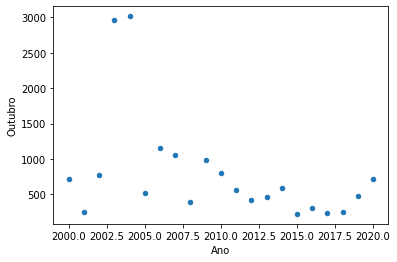

In [50]:
max_out = df.max()["Outubro"]
min_out = df.min()["Outubro"]
med_out = df.mean()["Outubro"]
desv_out = df.std()["Outubro"]
df.plot.scatter(x='Ano',y="Outubro")
print(f"Maxímo: {max_out} \nMínimo: {min_out} \nMédia: {med_out} \nDesvio: {desv_out}")

In [51]:
hOutubro = px.histogram(df,x='Outubro')
hOutubro.show()

In [52]:
px.box(df['Outubro'])

#Novembro

Maxímo: 1554.0 
Mínimo: 51.0 
Média: 560.2380952380952 
Desvio: 473.0642561811138


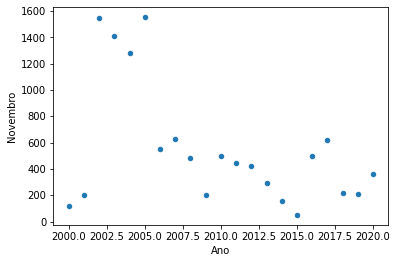

In [53]:
max_nov = df.max()["Novembro"]
min_nov = df.min()["Novembro"]
med_nov = df.mean()["Novembro"]
desv_nov = df.std()["Novembro"]
df.plot.scatter(x='Ano',y="Novembro")
print(f"Maxímo: {max_nov} \nMínimo: {min_nov} \nMédia: {med_nov} \nDesvio: {desv_nov}")

In [54]:
hNovembro = px.histogram(df,x='Novembro')
hNovembro.show()

In [55]:
px.box(df['Novembro'])

#Dezembro

Maxímo: 743.0 
Mínimo: 76.0 
Média: 303.04761904761904 
Desvio: 186.5975552333085


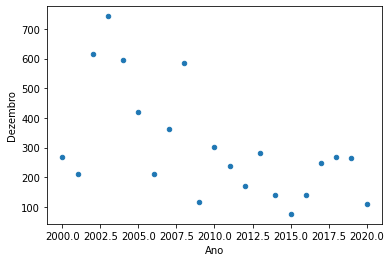

In [56]:
max_dez = df.max()["Dezembro"]
min_dez = df.min()["Dezembro"]
med_dez = df.mean()["Dezembro"]
desv_dez = df.std()["Dezembro"]
df.plot.scatter(x='Ano',y="Dezembro")
print(f"Maxímo: {max_dez} \nMínimo: {min_dez} \nMédia: {med_dez} \nDesvio: {desv_dez}")

In [57]:
hDezembro = px.histogram(df,x='Dezembro')
hDezembro.show()

In [58]:
px.box(df['Dezembro'])

#Gráfico do crescimento histórico Total e Gráfico Meses x N° de focos

In [59]:
soma_anos = df_transposta.sum()
figAnos = px.bar(soma_anos)
figAnos.update_layout(
    title = '',
    xaxis = dict(title='Anos'),
    yaxis = dict(title='Nº de focos de queimadas'),
    legend_title = 'Nº Focos',
    showlegend = False
)

max_anos = df_transposta.max()
figMaxAnos = px.line(max_anos)
figAnos.show()

In [60]:
grfBarra = go.Bar(
    x = df.columns[:-3], 
    y=df_transposta[2020] ,
    name = 'Ano 2020'
)
grfLinha1 = go.Scatter(
    x = df.columns[:-3], 
    y=df.max(),
    mode='lines+markers',
    name = 'Máximo'
)
grfLinha2 = go.Scatter(
    x = df.columns[:-3], 
    y=df.min(),
    mode='lines+markers',
    name = 'Mínimo'
)
grfLinha3 = go.Scatter(
    x = df.columns[:-3], 
    y=df.mean(),
    mode='lines+markers',
    name = 'Média'
)

dados = [grfBarra,grfLinha1,grfLinha2,grfLinha3]
layout = go.Layout(
    title = '',
    xaxis=dict(title='Meses'),
    yaxis=dict(title='Nº de focos de queimadas')
    
)

fig = go.Figure(data = dados, layout=layout)
fig.show()

#Correlações

In [61]:
df

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
2,189,118,148,59,47,55,125,936,444,721,122,268,3232,2000,269.333333
3,55,40,24,47,32,45,131,404,278,250,204,210,1720,2001,143.333333
4,332,67,56,97,75,119,1167,4961,4493,780,1545,614,14306,2002,1192.166667
5,360,182,300,668,1223,1242,1779,8109,5671,2958,1411,743,24646,2003,2053.833333
6,377,259,535,575,143,1023,1200,4488,3396,3015,1283,597,16891,2004,1407.583333
7,323,291,512,297,567,547,1183,4075,1184,519,1554,420,11472,2005,956.000000
8,247,193,310,586,1065,731,2213,5080,2638,1154,553,212,14982,2006,1248.500000
9,129,151,229,273,246,842,1001,2858,2732,1059,627,362,10509,2007,875.750000
10,167,197,171,329,732,298,1582,2005,1325,395,481,585,8267,2008,688.916667
11,191,83,269,619,552,391,421,3940,371,981,199,117,8134,2009,677.833333


In [62]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Medias
Janeiro,1.000000,0.472195,0.498053,0.206720,0.230193,0.546719,0.500759,0.755097,0.663679,0.672158,0.798954,0.641049,0.792299,-0.477609,0.792299
Fevereiro,0.472195,1.000000,0.785168,0.468480,0.484860,0.480059,0.340441,0.403200,0.124502,0.434565,0.498863,0.427300,0.467690,-0.149177,0.467690
Março,0.498053,0.785168,1.000000,0.701789,0.536452,0.599756,0.171820,0.464187,0.141967,0.529846,0.442646,0.194054,0.499604,-0.077853,0.499604
Abril,0.206720,0.468480,0.701789,1.000000,0.757195,0.512938,0.191852,0.486929,0.182281,0.476681,0.151236,0.062567,0.487466,0.171405,0.487466
Maio,0.230193,0.484860,0.536452,0.757195,1.000000,0.494724,0.356111,0.529188,0.258397,0.340745,0.201328,0.170346,0.530026,0.006388,0.530026
Junho,0.546719,0.480059,0.599756,0.512938,0.494724,1.000000,0.544028,0.707176,0.670138,0.767326,0.496152,0.406339,0.815533,-0.087982,0.815533
Julho,0.500759,0.340441,0.171820,0.191852,0.356111,0.544028,1.000000,0.555142,0.616124,0.276397,0.496150,0.397389,0.662488,0.018424,0.662488
Agosto,0.755097,0.403200,0.464187,0.486929,0.529188,0.707176,0.555142,1.000000,0.736465,0.731941,0.701487,0.581325,0.937129,-0.247108,0.937129
Setembro,0.663679,0.124502,0.141967,0.182281,0.258397,0.670138,0.616124,0.736465,1.000000,0.671938,0.736715,0.698144,0.874172,-0.308041,0.874172
Outubro,0.672158,0.434565,0.529846,0.476681,0.340745,0.767326,0.276397,0.731941,0.671938,1.000000,0.573369,0.638546,0.816155,-0.450579,0.816155


In [63]:
corr_transposta = df_transposta.corr()
corr_transposta.style.background_gradient(cmap='coolwarm')

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2000,1.000000,0.871152,0.725272,0.843617,0.907048,0.690723,0.739760,0.754006,0.561272,0.793397,0.838434,0.479334,0.728560,0.735989,0.854366,0.710005,0.568962,0.498653,0.690919,0.784565,0.700617
2001,0.871152,1.000000,0.862213,0.868755,0.901799,0.769622,0.760177,0.832031,0.708167,0.677655,0.845040,0.635590,0.748867,0.826059,0.808241,0.694572,0.701964,0.688179,0.710149,0.790710,0.639225
2002,0.725272,0.862213,1.000000,0.947531,0.883647,0.823082,0.878953,0.958369,0.817408,0.668204,0.877488,0.847017,0.869548,0.952359,0.853189,0.889800,0.903299,0.858149,0.799767,0.885198,0.749984
2003,0.843617,0.868755,0.947531,1.000000,0.952999,0.848384,0.943352,0.969399,0.821051,0.814152,0.945928,0.779226,0.935287,0.962147,0.940506,0.946138,0.869496,0.796045,0.873126,0.937348,0.866825
2004,0.907048,0.901799,0.883647,0.952999,1.000000,0.759830,0.849536,0.935783,0.699019,0.745586,0.888460,0.741539,0.827219,0.890163,0.873111,0.833759,0.787293,0.722262,0.747966,0.853869,0.754121
2005,0.690723,0.769622,0.823082,0.848384,0.759830,1.000000,0.897281,0.768040,0.804628,0.890131,0.947540,0.444618,0.942663,0.810438,0.925285,0.812130,0.764906,0.734709,0.924900,0.929662,0.864171
2006,0.739760,0.760177,0.878953,0.943352,0.849536,0.897281,1.000000,0.901552,0.928185,0.860319,0.956962,0.663302,0.980801,0.954379,0.958642,0.927551,0.914190,0.867064,0.962601,0.968997,0.909984
2007,0.754006,0.832031,0.958369,0.969399,0.935783,0.768040,0.901552,1.000000,0.813252,0.676903,0.878033,0.883546,0.878133,0.964242,0.857731,0.919056,0.923761,0.857583,0.795701,0.891074,0.762989
2008,0.561272,0.708167,0.817408,0.821051,0.699019,0.804628,0.928185,0.813252,1.000000,0.675938,0.832257,0.656671,0.881996,0.912494,0.819515,0.783917,0.922350,0.936666,0.890241,0.860119,0.753360
2009,0.793397,0.677655,0.668204,0.814152,0.745586,0.890131,0.860319,0.676903,0.675938,1.000000,0.929246,0.286353,0.893104,0.732017,0.946192,0.820696,0.605954,0.526170,0.920673,0.899303,0.940444
